<a href="https://colab.research.google.com/github/honghaerim/AI-programming/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D_11%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 47s 32ms/step - accuracy: 0.7475 - loss: 0.7018 - val_accuracy: 0.8679 - val_loss: 0.3640
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.8751 - loss: 0.3462 - val_accuracy: 0.8706 - val_loss: 0.3557
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.8927 - loss: 0.2952 - val_accuracy: 0.8876 - val_loss: 0.3021
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9060 - loss: 0.2610 - val_accuracy: 0.8962 - val_loss: 0.2789
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9167 - loss: 0.2281 - val_accuracy: 0.9047 - val_loss: 0.2664
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 45s 31ms/step - accuracy: 0.7281 - loss: 0.7681 - val_accuracy: 0.8577 - val_loss: 0.3867
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 88s 35ms/step - accuracy: 0.8630 - loss: 0.3753 - val_accuracy: 0.8702 - val_loss: 0.3488
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 76s 31ms/step - accuracy: 0.8822 - loss: 0

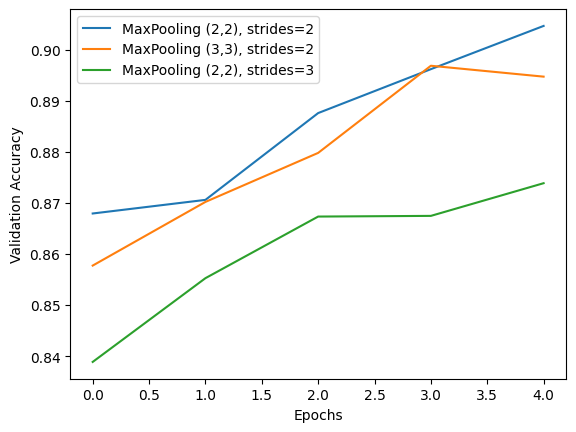

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 데이터 불러오기 및 전처리
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0

# 기본 모델 생성 (MaxPooling2D((2,2), strides=2))
def create_model(pool_size=(2, 2), strides=2):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=pool_size, strides=strides),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=pool_size, strides=strides),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# 모델 컴파일 및 학습 함수
def compile_and_train_model(model, train_images, train_labels, epochs=5):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=epochs,
                        validation_split=0.25, verbose=1)
    return history

# 기본 모델 학습 및 평가
model_1 = create_model(pool_size=(2, 2), strides=2)
history_1 = compile_and_train_model(model_1, train_images, train_labels)

# MaxPooling2D((3,3), strides=2) 모델 학습 및 평가
model_2 = create_model(pool_size=(3, 3), strides=2)
history_2 = compile_and_train_model(model_2, train_images, train_labels)

# MaxPooling2D((2,2), strides=3) 모델 학습 및 평가
model_3 = create_model(pool_size=(2, 2), strides=3)
history_3 = compile_and_train_model(model_3, train_images, train_labels)

# 결과 비교
def plot_accuracy(histories, labels):
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_accuracy'], label=label)
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.show()

plot_accuracy([history_1, history_2, history_3],
              ['MaxPooling (2,2), strides=2', 'MaxPooling (3,3), strides=2', 'MaxPooling (2,2), strides=3'])

2) 정확도는 감소한다. 더 넓은 영역의 픽셀을 한 번에 요약하기 때문에 데이터의 공간적 세부 정보가 더 많이 손실될 수 있다.
3) 정확도는 감소한다. 스트라이드가 커지면 풀링 윈도우가 데이터를 세 칸씩 건너뛰면서 이동하게 되고 이미지에서 많은 부분을 생략하게 되며, 중요한 특징을 학습하지 못할 확률이 높다.